In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
weather = pd.read_csv("D:\python\code5\AIlearning\sklearn\SVM支持向量机\weatherAUS5000.csv", index_col=0)

In [3]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


In [4]:
X = weather.iloc[:, :-1]
Y = weather.iloc[:, -1]

In [5]:
X.shape

(5000, 21)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4979 non-null   float64
 3   MaxTemp        4987 non-null   float64
 4   Rainfall       4950 non-null   float64
 5   Evaporation    2841 non-null   float64
 6   Sunshine       2571 non-null   float64
 7   WindGustDir    4669 non-null   object 
 8   WindGustSpeed  4669 non-null   float64
 9   WindDir9am     4651 non-null   object 
 10  WindDir3pm     4887 non-null   object 
 11  WindSpeed9am   4949 non-null   float64
 12  WindSpeed3pm   4919 non-null   float64
 13  Humidity9am    4936 non-null   float64
 14  Humidity3pm    4880 non-null   float64
 15  Pressure9am    4506 non-null   float64
 16  Pressure3pm    4504 non-null   float64
 17  Cloud9am       3111 non-null   float64
 18  Cloud3pm

In [7]:
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [8]:
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=420)

In [10]:
for i in [Xtrain, Ytrain, Xtest, Ytest]:
    i.index = range(i.shape[0])

In [11]:
Ytrain

0        No
1        No
2        No
3       Yes
4        No
       ... 
3495     No
3496    Yes
3497     No
3498     No
3499     No
Name: RainTomorrow, Length: 3500, dtype: object

In [12]:
Ytrain.value_counts()

No     2704
Yes     796
Name: RainTomorrow, dtype: int64

In [13]:
Ytest.value_counts()

No     1157
Yes     343
Name: RainTomorrow, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(Ytrain)
Ytrain = pd.DataFrame(encoder.transform(Ytrain))
Ytest = pd.DataFrame(encoder.transform(Ytest))

In [15]:
Ytrain.head()

,0
0,0
1,0
2,0
3,1
4,0


In [16]:
Ytest.head()

,0
0,0
1,0
2,1
3,0
4,0


In [17]:
Xtrain.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


In [18]:
Xtest.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


In [19]:
#观察异常值是大量存在，还是少数存在
Xtrain.loc[Xtrain.loc[:, "Cloud9am"] == 9, "Cloud9am"]

Series([], Name: Cloud9am, dtype: float64)

In [20]:
Xtest.loc[Xtest.loc[:, "Cloud9am"] == 9, "Cloud9am"]

Series([], Name: Cloud9am, dtype: float64)

In [21]:
Xtest.loc[Xtest.loc[:, "Cloud3pm"] == 9, "Cloud3pm"]

Series([], Name: Cloud3pm, dtype: float64)

In [22]:
# #少数存在，于是采取删除的策略
# #注意如果删除特征矩阵，则必须连对应的标签一起删除，特征矩阵的行和标签的行必须要一一对应
# Xtrain = Xtrain.drop(index=71737)
# Ytrain = Ytrain.drop(index=71737)

In [23]:
# #删除完毕之后，观察原始的数据结构，确认删除正确
# Xtrain.shape

In [24]:
# Xtest = Xtest.drop(index=[19646, 29632])
# Ytest = Ytest.drop(index=[19646, 29632])
# Xtest.shape

In [25]:
# #进行任何行删除之后，千万记得要恢复索引
# for i in [Xtrain, Xtest, Ytrain, Ytest]:
#     i.index = range(i.shape[0])

In [26]:
# Xtrain.head()

In [27]:
# Xtest.head()

In [28]:
Xtrainc = Xtrain.copy()

In [29]:
Xtrainc.sort_values(by="Location")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2796,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,13.0,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7
2975,2012-08-17,Adelaide,7.8,13.2,17.6,0.8,NaN,SW,61.0,SW,...,20.0,28.0,76.0,47.0,1012.5,1014.7,NaN,NaN,8.3,12.5
775,2013-03-16,Adelaide,17.4,23.8,NaN,NaN,9.7,SSE,46.0,S,...,9.0,19.0,63.0,57.0,1019.9,1020.5,NaN,NaN,19.1,20.7
861,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3
2906,2015-08-24,Adelaide,9.2,14.3,0.0,NaN,NaN,SE,48.0,SE,...,17.0,19.0,64.0,42.0,1024.7,1024.1,NaN,NaN,9.9,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,2009-05-08,Woomera,9.2,20.6,0.0,5.2,10.4,ESE,37.0,SE,...,19.0,19.0,64.0,34.0,1030.5,1026.9,0.0,1.0,13.7,20.1
1984,2014-05-26,Woomera,15.5,23.6,0.0,24.0,NaN,NNW,43.0,NNE,...,9.0,26.0,49.0,37.0,1014.2,1010.3,7.0,7.0,18.0,21.5
1592,2012-01-10,Woomera,16.8,26.7,0.0,10.0,5.3,SW,46.0,S,...,20.0,22.0,52.0,33.0,1019.1,1016.8,4.0,6.0,18.3,24.9
2824,2015-11-03,Woomera,16.2,28.5,7.8,4.2,4.5,WSW,80.0,NE,...,26.0,50.0,76.0,53.0,1009.6,1006.8,6.0,7.0,20.5,26.2


In [30]:
Xtrain.iloc[:, 0].value_counts()
#首先，日期不是独一无二的，日期有重复
#其次，在我们分训练集和测试集之后，日期也不是连续的，而是分散的
#某一年的某一天倾向于会下雨？或者倾向于不会下雨吗？
#不是日期影响了下雨与否，反而更多的是这一天的日照时间，湿度，温度等等这些因素影响了是否会下雨
#光看日期，其实感觉它对我们的判断并无直接影响
#如果我们把它当作连续型变量处理，那算法会人为它是一系列1~3000左右的数字，不会意识到这是日期

2015-10-12    6
2015-07-03    6
2014-05-16    6
2016-11-01    5
2009-07-17    5
             ..
2012-05-20    1
2016-08-26    1
2011-02-02    1
2012-08-05    1
2013-01-13    1
Name: Date, Length: 2141, dtype: int64

In [31]:
Xtrain.iloc[:, 0].value_counts().count()
#如果我们把它当作分类型变量处理，类别太多，有2141类，如果换成数值型，会被直接当成连续型变量，如果做成哑变量，我们特征的维度会爆炸

2141

In [32]:
Xtrain["Rainfall"].head(20)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.2
8      0.0
9      0.2
10     1.0
11     0.0
12     0.2
13     0.0
14     0.0
15     3.0
16     0.2
17     0.0
18    35.2
19     0.0
Name: Rainfall, dtype: float64

In [33]:
Xtrain["Rainfall"].isnull().sum()

33

In [34]:
Xtrain.loc[Xtrain["Rainfall"] >= 1, "RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1, "RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan, "RainToday"] = np.nan

In [35]:
Xtest.loc[Xtest["Rainfall"] >= 1, "RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1, "RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan, "RainToday"] = np.nan

In [36]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [37]:
int(Xtrain.loc[0, "Date"].split("-")[1])  #提取出月份

8

In [38]:
Xtrain["Date"] = Xtrain["Date"].apply(lambda x: int(x.split("-")[1]))

In [39]:
#替换完毕后，我们需要修改列的名称
#rename是比较少有的，可以用来修改单个列名的函数
#我们通常都直接使用 df.columns = 某个列表 这样的形式来一次修改所有的列名
#但rename允许我们只修改某个单独的列
Xtrain = Xtrain.rename(columns={"Date": "Month"})

In [40]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [41]:
Xtest["Date"] = Xtest["Date"].apply(lambda x: int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date": "Month"})

In [42]:
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [43]:
cityll = pd.read_csv(r"D:\python\code5\AIlearning\sklearn\SVM支持向量机\cityll.csv", index_col=0)
city_climate = pd.read_csv(r"D:\python\code5\AIlearning\sklearn\SVM支持向量机\Cityclimate.csv")

In [44]:
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


In [45]:
city_climate.head()

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


In [46]:
#去掉度数符号
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x: float(x[:-1]))
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x: float(x[:-1]))

In [47]:
#观察一下所有的经纬度方向都是一致的，全部是南纬，东经，因为澳大利亚在南半球，东半球
#所以经纬度的方向我们可以舍弃了
citylld = cityll.iloc[:, [0, 5, 6]]

In [48]:
#将city_climate中的气候添加到我们的citylld中
citylld["climate"] = city_climate.iloc[:, -1]

C:\Users\25338\AppData\Local\Temp\ipykernel_4812\3468038776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citylld["climate"] = city_climate.iloc[:, -1]


In [49]:
citylld.head()

,City,Latitudenum,Longitudenum,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


In [50]:
samplecity = pd.read_csv(r"D:\python\code5\AIlearning\sklearn\SVM支持向量机\samplecity.csv", index_col=0)
#我们对samplecity也执行同样的处理：去掉经纬度中度数的符号，并且舍弃我们的经纬度的方向
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x: float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x: float(x[:-1]))
samplecityd = samplecity.iloc[:, [0, 5, 6]]
samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


In [51]:
from math import radians, sin, cos, acos

citylld.loc[:, "slat"] = citylld.iloc[:, 1].apply(lambda x: radians(x))
citylld.loc[:, "slon"] = citylld.iloc[:, 2].apply(lambda x: radians(x))
samplecityd.loc[:, "elat"] = samplecityd.iloc[:, 1].apply(lambda x: radians(x))
samplecityd.loc[:, "elon"] = samplecityd.iloc[:, 2].apply(lambda x: radians(x))

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [53]:
citylld

,City,Latitudenum,Longitudenum,climate,slat,slon
0,Adelaide,34.9285,138.6007,Warm temperate,0.609617,2.419039
1,Albany,35.0275,117.8840,Mild temperate,0.611345,2.057464
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter",0.629605,2.564124
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter",0.630484,2.563571
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter",0.413608,2.336659
...,...,...,...,...,...,...
95,Wollongong,34.4278,150.8931,Warm temperate,0.600878,2.633581
96,Wyndham,15.4825,128.1228,"High humidity summer, warm winter",0.270221,2.236165
97,Yalgoo,28.3445,116.6851,"Hot dry summer, cool winter",0.494705,2.036539
98,Yulara,25.2335,130.9849,"Hot dry summer, warm winter",0.440408,2.286118


In [54]:
import sys

for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:, "slat"]
    slon = citylld.loc[:, "slon"]
    elat = samplecityd.loc[i, "elat"]
    elon = samplecityd.loc[i, "elon"]
    dist = 6371.01 * np.arccos(np.sin(slat) * np.sin(elat) +
                               np.cos(slat) * np.cos(elat) * np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    #每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中
    samplecityd.loc[i, "closest_city"] = citylld.loc[city_index, "City"]
    samplecityd.loc[i, "climate"] = citylld.loc[city_index, "climate"]

D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
D:\IDE\Anaconda\A\envs\dproject\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, *

In [55]:
#查看最后的结果，需要检查城市匹配是否基本正确
samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


In [56]:
#查看气候的分布
samplecityd["climate"].value_counts()

Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

In [57]:
#确认无误后，取出样本城市所对应的气候，并保存
locafinal = samplecityd.iloc[:, [0, -1]]
locafinal.head()

,City,climate
0,Canberra,Cool temperate
1,Sydney,Warm temperate
2,Perth,Warm temperate
3,Darwin,"High humidity summer, warm winter"
4,Hobart,Cool temperate


In [58]:
locafinal.columns = ["Location", "Climate"]
#在这里设定locafinal的索引为地点，是为了之后进行map的匹配
locafinal = locafinal.set_index(keys="Location")

In [59]:
locafinal.to_csv(r"samplelocation.csv")

In [60]:
locafinal.head()

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate


In [61]:
#是否还记得训练集长什么样呢？
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [62]:
#将location中的内容替换，并且确保匹配进入的气候字符串中不含有逗号，气候两边不含有空格
#我们使用re这个模块来消除逗号
#re.sub(希望替换的值，希望被替换成的值，要操作的字符串)
#x.strip()是去掉空格的函数
import re

Xtrain["Location"] = Xtrain["Location"].map(locafinal.iloc[:, 0]).apply(lambda x: re.sub(",", "", x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:, 0]).apply(lambda x: re.sub(",", "", x.strip()))

In [63]:
#修改特征内容之后，我们使用新列名“Climate”来替换之前的列名“Location”
#注意这个命令一旦执行之后，就再没有列"Location"了，使用索引时要特别注意
Xtrain = Xtrain.rename(columns={"Location": "Climate"})
Xtest = Xtest.rename(columns={"Location": "Climate"})

In [64]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Mild temperate,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Hot dry summer cool winter,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [65]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,Cool temperate,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,Mild temperate,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,Cool temperate,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Warm temperate,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Mild temperate,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [66]:
#查看缺失值的缺失情况
Xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.009429
Evaporation      0.433429
Sunshine         0.488571
WindGustDir      0.067714
WindGustSpeed    0.067714
WindDir9am       0.067429
WindDir3pm       0.024286
WindSpeed9am     0.009714
WindSpeed3pm     0.018000
Humidity9am      0.011714
Humidity3pm      0.026286
Pressure9am      0.098857
Pressure3pm      0.098857
Cloud9am         0.379714
Cloud3pm         0.401429
Temp9am          0.005429
Temp3pm          0.019714
RainToday        0.009429
dtype: float64

In [67]:
#首先找出，分类型特征都有哪些
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()

In [68]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am", "Cloud3pm"]
cate = cate + cloud
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [69]:
#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#注意，我们使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数
si.fit(Xtrain.loc[:, cate])
#然后我们用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:, cate] = si.transform(Xtrain.loc[:, cate])
Xtest.loc[:, cate] = si.transform(Xtest.loc[:, cate])

In [70]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,7.0,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,7.0,7.0,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,W,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Mild temperate,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Hot dry summer cool winter,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [71]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,Cool temperate,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,7.0,7.0,26.2,23.1,Yes
1,3,Mild temperate,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,Cool temperate,9.1,13.3,NaN,NaN,NaN,NE,41.0,N,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,No
3,10,Warm temperate,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,7.0,7.0,16.8,19.6,No
4,11,Mild temperate,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [72]:
#查看分类型特征是否依然存在缺失值
Xtrain.loc[:, cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [73]:
Xtest.loc[:, cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [74]:
#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [75]:
#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:, cate])

In [76]:
#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
Xtrain.loc[:, cate] = oe.transform(Xtrain.loc[:, cate])
Xtest.loc[:, cate] = oe.transform(Xtest.loc[:, cate])

In [77]:
Xtrain.loc[:, cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,1.0,2.0,6.0,0.0,0.0,0.0,7.0
1,0.0,6.0,4.0,6.0,0.0,7.0,7.0
2,4.0,13.0,4.0,0.0,0.0,1.0,3.0
3,4.0,8.0,3.0,8.0,0.0,6.0,6.0
4,2.0,5.0,0.0,6.0,0.0,2.0,4.0


In [78]:
Xtest.loc[:, cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,0.0,11.0,8.0,11.0,1.0,7.0,7.0
1,4.0,12.0,12.0,8.0,1.0,8.0,7.0
2,0.0,4.0,3.0,9.0,0.0,7.0,7.0
3,6.0,12.0,13.0,9.0,0.0,7.0,7.0
4,4.0,0.0,12.0,0.0,0.0,8.0,4.0


In [79]:
col = Xtrain.columns.tolist()

In [80]:
for i in cate:
    col.remove(i)

In [81]:
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [82]:
impmean = SimpleImputer(missing_values=np.nan, strategy="mean")

In [83]:
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:, col])

In [84]:
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:, col] = impmean.transform(Xtrain.loc[:, col])
Xtest.loc[:, col] = impmean.transform(Xtest.loc[:, col])

In [85]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,17.5,36.0,0.0,8.800000,7.508659,2.0,26.000000,6.0,...,15.0,57.0,51.651995,1016.8,1012.2,0.0,7.0,27.5,21.719003,0.0
1,12.0,0.0,9.5,25.0,0.0,5.619163,7.508659,6.0,33.000000,4.0,...,17.0,59.0,31.000000,1020.4,1017.5,7.0,7.0,14.6,23.600000,0.0
2,4.0,4.0,13.0,22.6,0.0,3.800000,10.400000,13.0,39.858413,4.0,...,31.0,79.0,68.000000,1020.3,1015.7,1.0,3.0,17.5,20.800000,0.0
3,11.0,4.0,13.9,29.8,0.0,5.800000,5.100000,8.0,37.000000,3.0,...,28.0,82.0,44.000000,1012.5,1005.9,6.0,6.0,18.5,27.500000,0.0
4,4.0,2.0,6.0,23.5,0.0,2.800000,8.600000,5.0,24.000000,0.0,...,15.0,58.0,35.000000,1019.8,1014.1,2.0,4.0,12.4,22.400000,0.0


In [86]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,0.0,22.0,27.8,25.200000,5.619163,7.508659,11.0,57.0,8.0,...,37.00000,91.000000,86.000000,1006.600000,1008.100000,7.0,7.0,26.200000,23.100000,1.0
1,3.0,4.0,12.0,18.6,2.200000,3.000000,7.800000,12.0,52.0,12.0,...,28.00000,88.000000,62.000000,1020.200000,1019.900000,8.0,7.0,14.800000,17.500000,1.0
2,3.0,0.0,9.1,13.3,2.487049,5.619163,7.508659,4.0,41.0,3.0,...,18.55339,69.069095,51.651995,1017.622067,1015.227077,7.0,7.0,16.989859,21.719003,0.0
3,10.0,6.0,13.1,20.3,0.000000,5.619163,7.508659,12.0,33.0,13.0,...,24.00000,40.000000,51.000000,1021.300000,1019.500000,7.0,7.0,16.800000,19.600000,0.0
4,11.0,4.0,12.2,20.0,0.400000,5.619163,7.508659,0.0,33.0,12.0,...,19.00000,92.000000,69.000000,1015.600000,1013.200000,8.0,4.0,13.600000,19.000000,0.0


In [89]:
Xtrain.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

In [90]:
Xtest.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

In [91]:
col.remove("Month")
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [92]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:, col])
Xtrain.loc[:, col] = ss.transform(Xtrain.loc[:, col])
Xtest.loc[:, col] = ss.transform(Xtest.loc[:, col])

In [93]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,0.826375,1.774044,-0.314379,0.964367,0.000000,2.0,-1.085893e+00,6.0,...,-0.416443,-0.646283,0.000000,-0.122589,-0.453507,0.0,7.0,1.612270,0.000000,0.0
1,12.0,0.0,-0.427048,0.244031,-0.314379,0.000000,0.000000,6.0,-5.373993e-01,4.0,...,-0.182051,-0.539186,-1.011310,0.414254,0.340522,7.0,7.0,-0.366608,0.270238,0.0
2,4.0,4.0,0.121324,-0.089790,-0.314379,-0.551534,1.062619,13.0,-1.113509e-15,4.0,...,1.458692,0.531786,0.800547,0.399342,0.070852,1.0,3.0,0.078256,-0.132031,0.0
3,11.0,4.0,0.262334,0.911673,-0.314379,0.054826,-0.885225,8.0,-2.239744e-01,3.0,...,1.107105,0.692432,-0.374711,-0.763819,-1.397352,6.0,6.0,0.231658,0.830540,0.0
4,4.0,2.0,-0.975421,0.035393,-0.314379,-0.854715,0.401087,5.0,-1.242605e+00,0.0,...,-0.416443,-0.592734,-0.815433,0.324780,-0.168855,2.0,4.0,-0.704091,0.097837,0.0


In [94]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,0.0,1.531425,0.633489,2.871067,0.000000,0.000000,11.0,1.343150,8.0,...,2.161868e+00,1.174369,1.681991,-1.643646,-1.067755,7.0,7.0,1.412848,0.198404,1.0
1,3.0,4.0,-0.035354,-0.646158,-0.036285,-0.794079,0.107073,12.0,0.951369,12.0,...,1.107105e+00,1.013723,0.506733,0.384430,0.700082,8.0,7.0,-0.335927,-0.606132,1.0
2,3.0,0.0,-0.489720,-1.383346,0.000000,0.000000,0.000000,4.0,0.089450,3.0,...,-4.163637e-16,0.000000,0.000000,0.000000,0.000000,7.0,7.0,0.000000,0.000000,0.0
3,10.0,6.0,0.136992,-0.409702,-0.314379,0.000000,0.000000,12.0,-0.537399,13.0,...,6.383207e-01,-1.556609,-0.031928,0.548465,0.640155,7.0,7.0,-0.029125,-0.304431,0.0
4,11.0,4.0,-0.004018,-0.451429,-0.263817,0.000000,0.000000,0.0,-0.537399,12.0,...,5.234093e-02,1.227917,0.849516,-0.301537,-0.303690,8.0,4.0,-0.520009,-0.390632,0.0


In [95]:
Ytrain.head()

,0
0,0
1,0
2,0
3,1
4,0


In [96]:
Ytest.head()

,0
0,0
1,0
2,1
3,0
4,0


In [97]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [98]:
Ytrain = Ytrain.iloc[:, 0].ravel()
Ytest = Ytest.iloc[:, 0].ravel()

In [101]:
#建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall以及AUC分数
times = time()  #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    clf = SVC(kernel=kernel
              , gamma="auto"
              , degree=1
              , cache_size=5000
              ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest, Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.844000, recall is 0.469388', auc is 0.869029
00:02:706729
poly 's testing accuracy 0.840667, recall is 0.457726', auc is 0.868157
00:03:082922
rbf 's testing accuracy 0.813333, recall is 0.306122', auc is 0.814873
00:04:520111
sigmoid 's testing accuracy 0.655333, recall is 0.154519', auc is 0.437308
00:04:937778


In [102]:
times = time()
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    clf = SVC(kernel=kernel
              , gamma="auto"
              , degree=1
              , cache_size=5000
              , class_weight="balanced"
              ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest, Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %
          (kernel, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.796667, recall is 0.775510', auc is 0.870062
00:03:064313
poly 's testing accuracy 0.793333, recall is 0.763848', auc is 0.871448
00:03:592064
rbf 's testing accuracy 0.803333, recall is 0.600583', auc is 0.819713
00:05:265564
sigmoid 's testing accuracy 0.562000, recall is 0.282799', auc is 0.437119
00:06:292608


In [103]:
times = time()
clf = SVC(kernel="linear"
          , gamma="auto"
          , cache_size=5000
          , class_weight={1: 10}  #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
          ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest, Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" % (score, recall, auc))
print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S:%f"))

testing accuracy 0.636667, recall is 0.912536', auc is 0.866360
00:05:615061


In [104]:
valuec = pd.Series(Ytest).value_counts()

In [105]:
valuec

0    1157
1     343
dtype: int64

In [106]:
valuec[0] / valuec.sum()

0.7713333333333333

In [107]:
from sklearn.metrics import confusion_matrix as CM

clf = SVC(kernel="linear"
          , gamma="auto"
          , cache_size=5000
          ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
cm = CM(Ytest, result, labels=(1, 0))
cm

array([[ 161,  182],
       [  52, 1105]], dtype=int64)

In [108]:
specificity = cm[1, 1] / cm[1, :].sum()
specificity  #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.9550561797752809

In [110]:
irange = np.linspace(0.01, 0.05, 10)

In [111]:
for i in irange:
    times = time()
    clf = SVC(kernel="linear"
              , gamma="auto"
              , cache_size=5000
              , class_weight={1: 1 + i}
              ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest, Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %
          (1 + i, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S:%f"))

under ratio 1:1.010000 testing accuracy 0.844667, recall is 0.475219', auc is 0.869157
00:03:705749
under ratio 1:1.014444 testing accuracy 0.844667, recall is 0.478134', auc is 0.869195
00:03:518813
under ratio 1:1.018889 testing accuracy 0.844667, recall is 0.478134', auc is 0.869200
00:03:436722
under ratio 1:1.023333 testing accuracy 0.845333, recall is 0.481050', auc is 0.869183
00:03:436992
under ratio 1:1.027778 testing accuracy 0.844000, recall is 0.481050', auc is 0.869394
00:03:479432
under ratio 1:1.032222 testing accuracy 0.844000, recall is 0.481050', auc is 0.869528
00:03:363077
under ratio 1:1.036667 testing accuracy 0.844000, recall is 0.481050', auc is 0.869659
00:03:551142
under ratio 1:1.041111 testing accuracy 0.844667, recall is 0.483965', auc is 0.869629
00:03:404495
under ratio 1:1.045556 testing accuracy 0.844667, recall is 0.483965', auc is 0.869712
00:03:415671
under ratio 1:1.050000 testing accuracy 0.845333, recall is 0.486880', auc is 0.869863
00:04:024431


In [112]:
irange_ = np.linspace(0.018889, 0.027778, 10)
for i in irange_:
    times = time()
    clf = SVC(kernel="linear"
              , gamma="auto"
              , cache_size=5000
              , class_weight={1: 1 + i}
              ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest, Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest, clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %
          (1 + i, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S:%f"))

under ratio 1:1.018889 testing accuracy 0.844667, recall is 0.478134', auc is 0.869225
00:04:064657
under ratio 1:1.019877 testing accuracy 0.844000, recall is 0.478134', auc is 0.869228
00:03:561695
under ratio 1:1.020864 testing accuracy 0.844000, recall is 0.478134', auc is 0.869218
00:03:445432
under ratio 1:1.021852 testing accuracy 0.844667, recall is 0.478134', auc is 0.869188
00:03:295498
under ratio 1:1.022840 testing accuracy 0.844667, recall is 0.478134', auc is 0.869220
00:03:439694
under ratio 1:1.023827 testing accuracy 0.844667, recall is 0.481050', auc is 0.869188
00:03:426189
under ratio 1:1.024815 testing accuracy 0.844667, recall is 0.481050', auc is 0.869231
00:03:342199
under ratio 1:1.025803 testing accuracy 0.844000, recall is 0.481050', auc is 0.869253
00:03:517746
under ratio 1:1.026790 testing accuracy 0.844000, recall is 0.481050', auc is 0.869233
00:03:396531
under ratio 1:1.027778 testing accuracy 0.844000, recall is 0.481050', auc is 0.869326
00:03:441518


In [113]:
from sklearn.linear_model import LogisticRegression as LR

In [114]:
logclf = LR(solver='liblinear').fit(Xtrain, Ytrain)
logclf.score(Xtest, Ytest)

0.8486666666666667

In [115]:
C_range = np.linspace(3, 5, 10)

for C in C_range:
    logclf = LR(solver='liblinear', C=C).fit(Xtrain, Ytrain)
    print(C, logclf.score(Xtest, Ytest))

3.0 0.8493333333333334
3.2222222222222223 0.8493333333333334
3.4444444444444446 0.8493333333333334
3.6666666666666665 0.8493333333333334
3.888888888888889 0.8493333333333334
4.111111111111111 0.8493333333333334
4.333333333333333 0.8493333333333334
4.555555555555555 0.8493333333333334
4.777777777777778 0.8493333333333334
5.0 0.8493333333333334


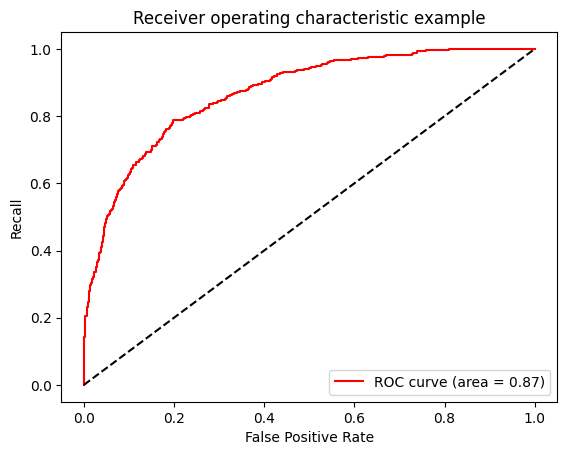

In [116]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(Ytest, clf.decision_function(Xtest), pos_label=1)
area = roc_auc_score(Ytest, clf.decision_function(Xtest))
plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [117]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

-0.8663844038182453

In [118]:
from sklearn.metrics import accuracy_score as AC

clf = SVC(kernel="linear", C=3.1663157894736838, cache_size=5000
          , class_weight="balanced"
          ).fit(Xtrain, Ytrain)
prob = pd.DataFrame(clf.decision_function(Xtest))
prob.loc[prob.iloc[:, 0] >= thresholds[maxindex], "y_pred"] = 1
prob.loc[prob.iloc[:, 0] < thresholds[maxindex], "y_pred"] = 0
prob.loc[:, "y_pred"].isnull().sum()

0

In [119]:
times = time()
#检查模型本身的准确度
score = AC(Ytest, prob.loc[:, "y_pred"].values)
recall = recall_score(Ytest, prob.loc[:, "y_pred"])
print("testing accuracy %f,recall is %f" % (score, recall))
print(datetime.datetime.fromtimestamp(time() - times).strftime("%M:%S:%f"))

testing accuracy 0.642000,recall is 0.927114
00:00:005265
